In [4]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
# plt.style.use('seaborn-whitegrid')
data_root = '/mnt/aitrics_ext/ext01/mike/tmp/predicting_pressure_ulcer/results'

with open(os.path.join(data_root, 'MLP/fi.txt'), 'r') as f:
    fi_from_PI = f.readlines()

with open(os.path.join(data_root, 'LSTM/fi.txt'), 'r') as f:
    fi_from_IG = f.readlines()


def parser(lines):
    names = [line.split(':')[0].strip() for line in lines]
    means = [float(line.split(':')[1].split('(')[0].strip()) for line in lines]
    stds = [float(line.split(':')[1].split('(')[1].strip().replace(')', '')) \
            for line in lines]
    return names, means, stds
# print (fi_from_PI)
# names_pi, means_pi, stds_pi = parser(fi_from_PI)
# names_ig, means_ig, stds_ig = parser(fi_from_IG)

pi = parser(fi_from_PI)
ig = parser(fi_from_IG)


In [5]:
def plot(ordered_feature_importance, title):
    use_topn = 20
    names, means, stds = ordered_feature_importance
    
    y_ticks = np.arange(0, use_topn)
    fig, ax = plt.subplots(figsize=(20,10))
    ax.barh(y_ticks, (means[:use_topn]), xerr=stds[:use_topn])
    ax.set_yticklabels(names[:use_topn], fontsize=15)
    ax.set_yticks(y_ticks)
    ax.set_title(title, fontsize=30)
    ax.invert_yaxis()
    fig.tight_layout()
    plt.show()


/home/mike/virtual_env/pu/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


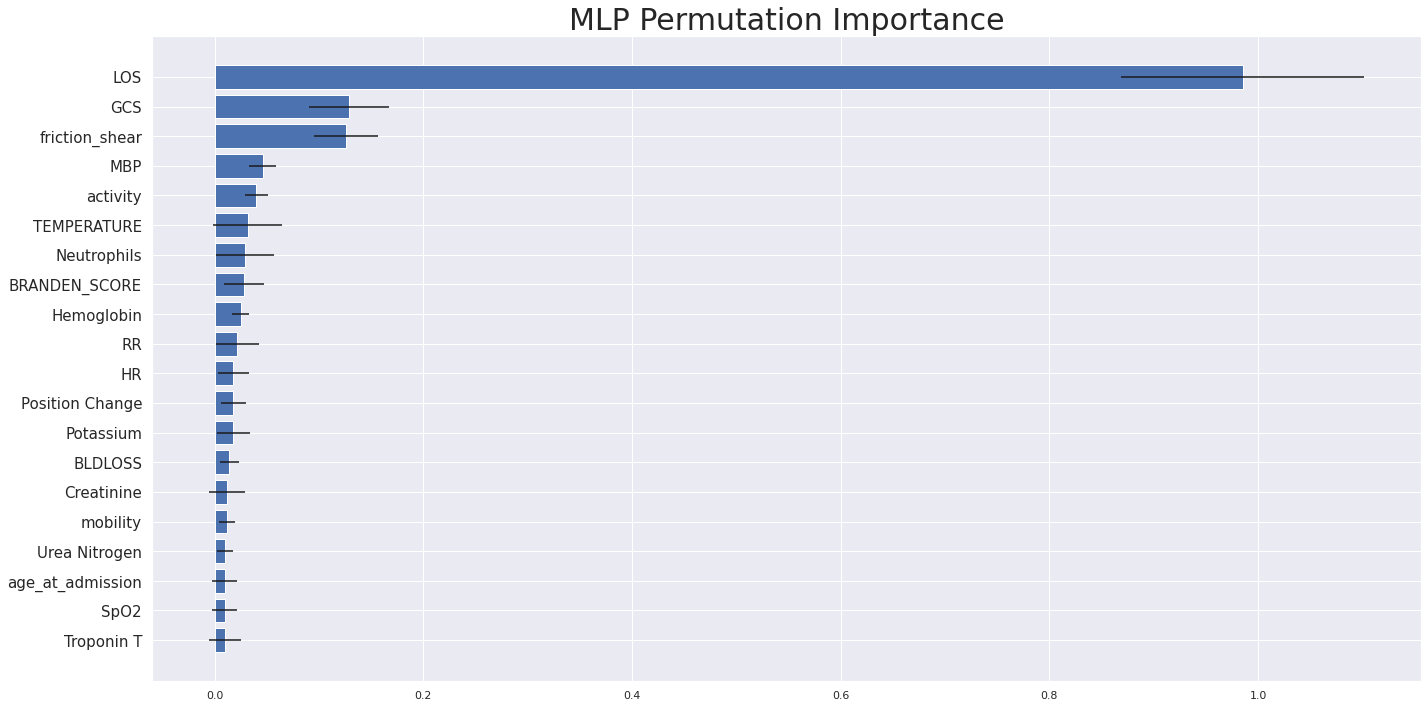

In [6]:
plot(pi, 'MLP Permutation Importance')

/home/mike/virtual_env/pu/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


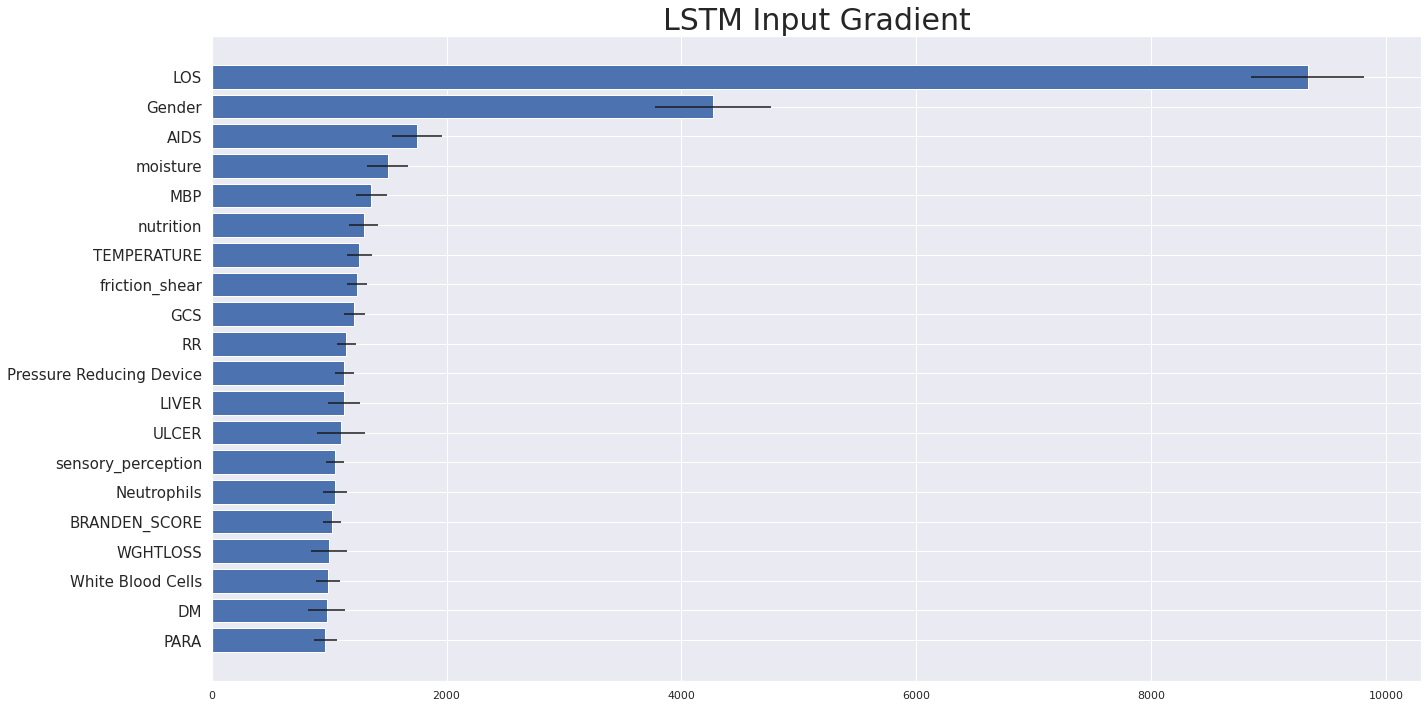

In [7]:
plot(ig, 'LSTM Input Gradient')